# Project Introduction

### Dataset 
- Enrollment data for three public Iowa universities from 2012-2021, Iowa State University, University of Iowa, and University of Northern Iowa
- Enrollment data is collected on the 10th day of the fall semester 
- The data includes headcounts for both undergraduate, graduate, and professional students(except for UNI), as well as in-state and out-of-state residents 

### Project
- This project aims to see if there was a significant change in enrollment for the public Iowa universities in 2020 and 2021
- The project assumes that a large portion of change would be due to Covid
- The overall purpose of the project is not to determine if there was a negative change in enrollement due to Covid, as that is pretty well established, but rather to see if that change is ststistically significant when taken in the context of enrollemnt fluctuation in previous years
- An additional point of interest is the change in enrollment from 2020-2021, which will be used a metric to see if the change has slowed, or increased
    - The statistics used for this project is standard deviations from the mean, which is converted to z and p values 

Libraries used for this Project
- Pandas
- Re (Regex)
- MatplotLib
- Statistics 
- Scipy


# Project

## Import Statements

In [ ]:

# importing pandas and readinhg in data

import pandas as pd
import matplotlib.pyplot as plt
import re
import statistics
from scipy.stats import norm
df = pd.read_csv('C:\\Users\\jacka\\OneDrive\\Desktop\\Data Analytics\\master_datasets\\Regent_University_Fall_Enrollment_By_Student_Classification_And_Resident_Status.csv')

## Exploring the Dataset

In [ ]:
# checks data information
print(df.info())

In [ ]:
# check for null values 
df.isnull().values.any()

In [ ]:
# seeing data
df.head(20)

## Cleaning the Dataset

In [ ]:
# fixing error where data was misentered with an extra space, replace because extra space version has unique info 
df_replaced = df.replace('Iowa State  University','Iowa State University')


In [ ]:
# delete duplicates of info
df_fixed = df_replaced.drop_duplicates()

In [ ]:
print(df_fixed.info())

## Organizing the Data

### Headcount by University and Year

In [ ]:
# set indexes 
df_fixed_no_index = df_fixed.reset_index()
df_fixed = df_fixed.set_index(['University Name','Year'])
print(df_fixed)

In [ ]:

# sum up the headcounts for each index, in this case year and semester 
headcount_totals = df_fixed.groupby(df_fixed.index)['Headcount'].sum()
print(headcount_totals)



### Headcount by University, Year, and Student Classification

In [ ]:
df_student_class = df_fixed_no_index.copy(deep=False)
df_student_class = df_student_class.set_index(['University Name','Year','Student Classification'])
df_student_class.drop(index='Index')
df_student_class

In [ ]:
# sum up the headcounts for each index, in this case year and semester 
headcount_totals_by_class = df_student_class.groupby(df_student_class.index)['Headcount'].sum()
print(headcount_totals_by_class)

### Headcount by University, Year, and Living Location

In [ ]:
df_living = df_fixed_no_index.copy(deep=False)
df_living = df_living.set_index(['University Name','Year','Resident Status'])
df_living.drop(index='Index')
df_living

In [ ]:
# sum up the headcounts for each index, in this case year and semester 
headcount_totals_by_living = df_living.groupby(df_living.index)['Headcount'].sum()
print(headcount_totals_by_living)

### Making Lists of the Data

In [25]:
def ListFromHeadcount(headcount):
    values = [x for x in headcount]
    keys = [x for x in headcount.keys()]
    keys = [re.sub(r'\W','',str(key)) for key in keys]
    keys2 = [key[-4:] for key in keys]
    return values, keys2

### Total Headcount

In [ ]:
headcount_total_values, headcount_total_keys = ListFromHeadcount(headcount_totals)

years = headcount_total_keys[0:10]

iowa_state_values_hct = headcount_total_values[0:10]
uiowa_values_hct = headcount_total_values[10:20]
uni_values_hct = headcount_total_values[20:30]

### By Student Class

In [70]:
values = [x for x in headcount_totals_by_class]
keys = [x for x in headcount_totals_by_class.keys()]

graduate_values_isu = values[0:30:3]   
professional_values_isu = values[1:30:3]
undergrad_values_isu = values[2:30:3]

graduate_values_uiowa = values[30:60:3]   
professional_values_uiowa = values[31:60:3]
undergrad_values_uiowa = values[32:60:3]

# UNI doesn't have values for the professional group
graduate_values_uni = values[60:80:2]   
undergrad_values_uni = values[61:80:2]



### By Resident Status

In [76]:
values = [x for x in headcount_totals_by_living]
keys = [x for x in headcount_totals_by_living.keys()]

non_resident_isu = values[0:20:2]
resident_isu = values[1:20:2]

non_resident_uiowa = values[20:40:2]
resident_uiowa = values[21:40:2]

non_resident_uni = values[40:60:2]
resident_uni = values[41:60:2]


## Plotting the Data

In [72]:
def graph(data,years,labels,title_name=None):
    plt.plot(years,data[0],label=labels[0])
    plt.plot(years,data[1],label=labels[1])
    if len(labels) == 3:
        plt.plot(years,data[2],label=labels[2])
    plt.title(title_name)
    plt.legend()
    plt.show()



### Overall Headcount

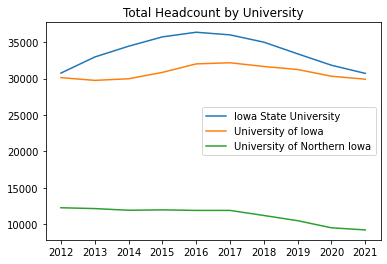

In [73]:
labels = ['Iowa State University','University of Iowa', 'University of Northern Iowa']
data = [iowa_state_values_hct,uiowa_values_hct,uni_values_hct]
title = 'Total Headcount by University'

graph(data,years,labels,title)


### Headcount by Student Class

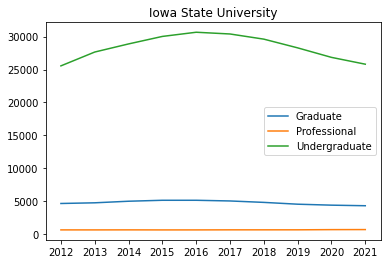

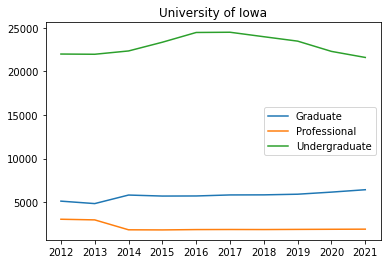

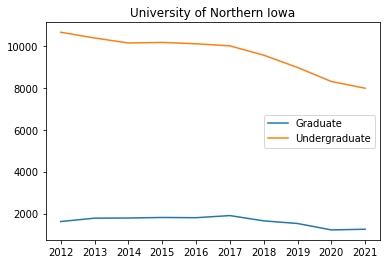

In [74]:
labels = ['Graduate','Professional','Undergraduate']
labels2 = ['Graduate','Undergraduate']
isu_data = [graduate_values_isu,professional_values_isu,undergrad_values_isu]
school_name = 'Iowa State University'

uiowa_data = [graduate_values_uiowa,professional_values_uiowa,undergrad_values_uiowa]
school_name2 = 'University of Iowa'

uni_data = [graduate_values_uni,undergrad_values_uni]
school_name3 = 'University of Northern Iowa'

graph(isu_data,years,labels,school_name)
graph(uiowa_data,years,labels,school_name2)
graph(uni_data,years,labels2,school_name3)

### Headcount by Resident Status

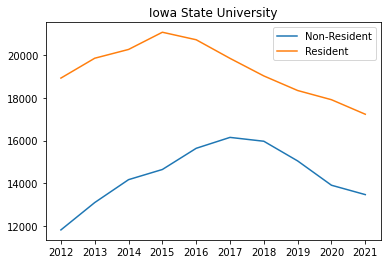

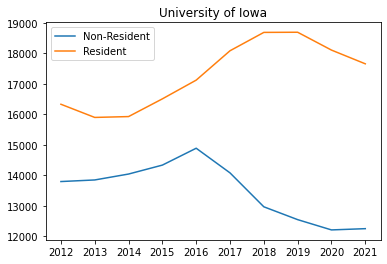

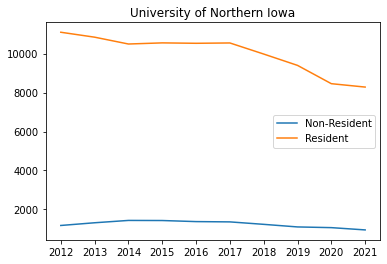

In [78]:
labels3 = ['Non-Resident','Resident']
isu_data_living = [non_resident_isu,resident_isu]
school_name = 'Iowa State University'

uiowa_data_living = [non_resident_uiowa,resident_uiowa]
school_name2 = 'University of Iowa'

uni_data_living = [non_resident_uni,resident_uni]
school_name3 = 'University of Northern Iowa'

graph(isu_data_living,years,labels3,school_name)
graph(uiowa_data_living,years,labels3,school_name2)
graph(uni_data_living,years,labels3,school_name3)

# Statistically Significant?

In [ ]:
# function to get all relevent statistics for analysis 
def get_statistics(dataset,year_index):
    std = statistics.stdev(dataset[0:7])
    mean = statistics.mean(dataset[0:7])
    z_value = (mean - dataset[year_index])/std # number of standard deviations from the mean
    p_value = norm.sf(abs(z_value)) # calculates the p-value from the previous line 
    return std,mean,z_value,p_value

## Looking at the Overall Values for Significance

In [84]:

isu_std,isu_mean,isu_z,isu_p = get_statistics(iowa_state_values_hct,8)
uiowa_std,uiowa_mean,uiowa_z,uiowa_p = get_statistics(uiowa_values_hct,8)
uni_std,uni_mean,uni_z,uni_p = get_statistics(uni_values_hct,8)


In [85]:
print(f'The p value for the enrollment in Iowa State University in 2020 was {isu_p}.')
print(f'The p value for the enrollment in University of Iowa in 2020 was {uiowa_p}.')
print(f'The p value for the enrollment in University of Northern Iowa in 2020 was {uni_p}.')

The p value for the enrollment in Iowa State University in 2020 was 0.09342711433657885.
The p value for the enrollment in University of Iowa in 2020 was 0.27284398717191893.
The p value for the enrollment in University of Northern Iowa in 2020 was 8.42666172295273e-13.


### Looking at 2021

In [86]:
isu_std2,isu_mean2,isu_z2,isu_p2 = get_statistics(iowa_state_values_hct,9)
uiowa_std2,uiowa_mean2,uiowa_z2,uiowa_p2 = get_statistics(uiowa_values_hct,9)
uni_std2,uni_mean2,uni_z2,uni_p2 = get_statistics(uni_values_hct,9)

In [87]:
print(f'The p value for the enrollment in Iowa State University in 2021 was {isu_p2}.')
print(f'The p value for the enrollment in University of Iowa in 2021 was {uiowa_p2}.')
print(f'The p value for the enrollment in University of Northern Iowa in 2021 was {uni_p2}.')

The p value for the enrollment in Iowa State University in 2021 was 0.030027514360337765.
The p value for the enrollment in University of Iowa in 2021 was 0.1570100240647616.
The p value for the enrollment in University of Northern Iowa in 2021 was 1.2000905526208638e-15.


## Looking at the Change Between Years for Significance

In [90]:
def change(values,empty_list):
    for i,_ in enumerate(values):
        change = values[i] - values[i-1]
        empty_list.append(change)
    return empty_list

In [91]:
iowa_state_change = []
iowa_state_change = change(iowa_state_values_hct,iowa_state_change)
uiowa_change = []
uiowa_change = change(uiowa_values_hct,uiowa_change)
uni_change = []
uni_change = change(uni_values_hct,uni_change)


In [92]:
# finding the standard deviation of the yeqrs before covid change from year to year
isu_std_change,isu_mean_change,isu_change_z,isu_change_p = get_statistics(iowa_state_change,8)
uiowa_std_change,uiowa_mean_change,uiowa_change_z,uiowa_change_p = get_statistics(uiowa_change,8)
uni_std_change,uni_mean_change,uni_change_z,uni_change_p = get_statistics(uni_change,8)

In [93]:
print(f'The p value for the change of enrollment in Iowa State University in 2020 was {isu_change_p}.')
print(f'The p value for the change of enrollment in University of Iowa in 2020 was {uiowa_change_p}.')
print(f'The p value for the change of enrollment in University of Northern Iowa in 2020 was {uni_change_p}.')

The p value for the change of enrollment in Iowa State University in 2020 was 0.026613916529251245.
The p value for the change of enrollment in University of Iowa in 2020 was 0.02692806394715492.
The p value for the change of enrollment in University of Northern Iowa in 2020 was 0.15550230999719256.


### Looking at 2021

In [94]:
# finding the z-value of the the 2020 values 
isu_std_change2,isu_mean_change2,isu_change_z2,isu_change_p2 = get_statistics(iowa_state_change,9)
uiowa_std_change2,uiowa_mean_change2,uiowa_change_z2,uiowa_change_p2 = get_statistics(uiowa_change,9)
uni_std_change2,uni_mean_change2,uni_change_z2,uni_change_p2 = get_statistics(uni_change,9)

In [95]:
print(f'The p value for the change of enrollment in Iowa State University in 2021 was {isu_change_p2}.')
print(f'The p value for the change of enrollment in University of Iowa in 2021 was {uiowa_change_p2}.')
print(f'The p value for the change of enrollment in University of Northern Iowa in 2021 was {uni_change_p2}.')

The p value for the change of enrollment in Iowa State University in 2021 was 0.06244581818915346.
The p value for the change of enrollment in University of Iowa in 2021 was 0.1392321753596028.
The p value for the change of enrollment in University of Northern Iowa in 2021 was 0.32194582493257506.


# Conclusions


**Overall Values**

There are a few conclusions we can draw from this data, the first being the ones gathered from the p-value data. Looking at the data that looks for a significant difference in total enrollment in 2020 and 2021, we can see that in both 2020 and 2021 Iowa State University and the University of Northern Iowa have a p-value under .05, which allows us to reject the null hypothesis and say that these values are statistically significant in their difference compared to the rest of the given data. However, it must be noted that both of these universities were previously on a downward trajectory in enrollment, so while the total is still significant there might be a better conclsuion found in the change comparison in the next section.

Conversly, this data has the University of Iowa enrollment in both 2020 and 2021 failing to acheive the significance level, so we can not reject the null hypothesis for this data. This menas that in this context the University of Iowa did not experience a significant change in overall headcount in 2020, or 2021. Looking at past data this might be due to a higher variability in the enrollment numbers, which leads to a higher standard deviation that increases the p-value. It might aslo be concluded that the higher past varaiblity leaves the University of Iowa more prepared for enrollment number changes.

**Change Year-to-Year 2019-2020**

The next section of data that we can look at is the part looking at the change in enrollment from year to year and if the change from 2019-2020 or 2020-2021 is significant. Looking at this data for the 2019-2020 change we can see that the p-values for Iowa State and University of Iowa achieve the desired significance level, so their change can not reject the null hypothesis. For the University of Iowa this is in contrast to the previous data, menaing that while the enrollment numbers itself wasn't significant the change from the previous year was. This leads to the conclusion that even with its past varaiblity, University of Iowa still experienced a more dramatic change from 2019-2020. 

Looking at Iowa State University we have now observed a significant change in both sections of data, so we can safely conclude that the enrollment for Iowa State Unibversity in 2020 did experience a significant decline.

Looking at the data for the University of Northern Iowa, we see that the change did not meet the desired significance. This is in contrast to the previous data which did show a significant change. This leads to the conclusion that, while the enrollment numbers for UNI were significant in context of previosu years, the change was not. This, and the plot above, points to a downward trend in enrollment that wasn't necessarily due to Covid.

**Change Year-to-Year 2020-2021**

The next section of data looks at the change in enrollment from 2020-2021. This data can be used a a metric on the recent status of the enrollment of these universities, as well as a look at if the trend from 2020 has continued, and if it was larger or smaller than the 2019-2020 change. Looking at the p-values for this data, we can see that all of them fail to meet the significance level, with Iowa State just above it. With this data and the graph above, we can see that the change in enrollment has started to stagnate for these universities. This means that while there was not a recovery of students in 2021, there was no more loss of students either. Future data must be analyzed to see if this stagnation will stay or if there will be a recovery or further decline in the numbers. Overall, though this stagantion means that many of the students in 2020 who chose not to attend, did not come in 2021.

Even though none of the universities met the significance levels for the change from 2020-2021, we can still gather some data from the numbers themsleves. This involves the comparison of the numbers as a way of measuring how much the change has slowed for each university. Looking at the numbers we find the Iowa State Univeristy still experienced a somewhat notable decline in numnbers, as it was almost still significant compared to the 2019-2020 change. This is in contrast to the other two universities, which both have a much higher p-value. This leads to the conclusion that University of Iowa and Univeristy of Northern Iowa have seen much less change from 2020-2021 than Iowa State. However, it must be noted that of the universities Iowa State has seen the most historical decline, so this trajectory isn't necessarily something unique to 2020 and 2021. 

**Student Classification**

Looking at the plots for the various student classifications at each uniiversity there are few interesting things to note. The first being that the change for enrollment in each university seems to have mostly come from the undergarduate pool of students, while the gradute and professional numbers seemed to stay the same, or even increase. This leads to the a previously determined conclusion, which is that most of the enrollment decrease is from first-year students choosing not to come, rather than other students leaving. While this conclusion might seem rather obvious, it is still interesting to note just how much the undergradute population has decreased at each university.

**Resident Status**

Looking at the data plots for Resident Status we can see that thy follow a similar pattern at each university, which is that both the non-resident and resident numbers decreased at about the same rate. This means that being an Iowa resident or not did not seem to have much of an impact on a student's descion to attend university. This seems to contradict the assumption that students would choose to stay closer to home for univerity in events like Covid, however this doesn't account for students choosing to not attend univeristy at all.

**Final Thoughts**

Looking at the data as a whole there are a few points I feel we can make:
* Student enrollment did decrease signficantly in 2020, whether that be in contect of previous numbers or previous year-to-year change
* The bulk of the enrollment decline seemed to come from undergraduates
* Resident status did not seem to be a factor in enrollment
* All univeristies are a trend of declining enrollment, starting before 2020
* The enrollment numbers have seemed to stagnate in 2021, meaning those who didn't come in 2020 likely didn't come in 2021

An important note for these conclusions is that, while it is easy to say that Covid was the factor, there could be other factors such as the ones causing the previous negative trend in enrollment that each univeristy has has prior to 2020.

Overall, data for the next few years will help continue this analysis and answer some questions such as, is the enrollment going to recover? Additonly, while the data doesn;t suggest so right now, will there be future decline in the coming years? These types of questions as well as the conclusions presented in this project must be evaluated in the future, when there is more data available.

